In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

In [0]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


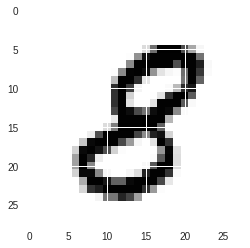

In [4]:
plt.imshow(mnist.train.images[5].reshape(28,28), cmap='Greys')

## The Generator

In [0]:
def generator(z,reuse=None):
    with tf.variable_scope('gen',reuse=reuse):
        hidden1 = tf.layers.dense(inputs=z,units=128)
        # Leaky Relu
        alpha = 0.01
        hidden1 = tf.maximum(alpha*hidden1,hidden1)
        hidden2 = tf.layers.dense(inputs=hidden1,units=128)
        
        hidden2 = tf.maximum(alpha*hidden2,hidden2)
        output = tf.layers.dense(hidden2,units=784,activation=tf.nn.tanh)
        return output

## The Discriminator

In [0]:
def discriminator(X,reuse=None):
    with tf.variable_scope('dis',reuse=reuse):
        hidden1 = tf.layers.dense(inputs=X,units=128)
        # Leaky Relu
        alpha = 0.01
        hidden1 = tf.maximum(alpha*hidden1,hidden1)
        
        hidden2 = tf.layers.dense(inputs=hidden1,units=128)
        hidden2 = tf.maximum(alpha*hidden2,hidden2)
        
        logits = tf.layers.dense(hidden2,units=1)
        output = tf.sigmoid(logits)
    
        return output, logits

## Placeholder

In [0]:
real_images = tf.placeholder(tf.float32, shape =[None, 784])
z = tf.placeholder(tf.float32, shape=[None, 100])

## Generator

In [0]:
G = generator(z)

## Discriminator

In [0]:
D_output_real, D_logits_real = discriminator(real_images)

In [0]:
D_output_fake, D_logits_fake = discriminator(G,reuse=True)

## Losses

In [0]:
def loss_func(logits_in,labels_in):
  return tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits_in,labels=labels_in))

In [0]:
D_real_loss = loss_func(D_logits_real,tf.ones_like(D_logits_real)*(0.9))

In [0]:
D_fake_loss = loss_func(D_logits_fake,tf.zeros_like(D_logits_real))

In [0]:
D_loss = D_real_loss +D_fake_loss

In [0]:
G_loss = loss_func(D_logits_fake,tf.ones_like(D_logits_fake))

## Optimizer

In [18]:
learning_rate = 0.001

tvars = tf.trainable_variables()

d_vars = [var for var in tvars if 'dis' in var.name]
g_vars = [var for var in tvars if 'gen' in var.name]

print([v.name for v in d_vars])
print([v.name for v in g_vars])

['dis/dense/kernel:0', 'dis/dense/bias:0', 'dis/dense_1/kernel:0', 'dis/dense_1/bias:0', 'dis/dense_2/kernel:0', 'dis/dense_2/bias:0']
['gen/dense/kernel:0', 'gen/dense/bias:0', 'gen/dense_1/kernel:0', 'gen/dense_1/bias:0', 'gen/dense_2/kernel:0', 'gen/dense_2/bias:0']


In [0]:
D_trainer = tf.train.AdamOptimizer(learning_rate).minimize(D_loss, var_list = d_vars)
G_trainer = tf.train.AdamOptimizer(learning_rate).minimize(G_loss, var_list = g_vars)

## Training Session

In [0]:
batch_size = 100
epochs = 500
init = tf.global_variables_initializer()
saver = tf.train.Saver(var_list = g_vars)

In [0]:
#Save a sample per epoch
samples = []

In [25]:
with tf.Session() as sess:
  
  sess.run(init)
  
  for e in range(epochs):
    # indicats classic division
    num_batches = mnist.train.num_examples // batch_size
    
    for i in range(num_batches):
      
      #Grab batch of images
      batch = mnist.train.next_batch(batch_size)
      
      #Get images, reshape and rescale to pass to D
      batch_images = batch[0].reshape((batch_size,784))
      batch_images = batch_images*2 - 1
      
      # Z (random Latent noise data for Generator)
      # -1 ro 1 because of tanh activation
      batch_z = np.random.uniform(-1, 1, size=(batch_size,100))
      
      #Run optimizers, no need to save outputs, we won't use them
      
      _ = sess.run(D_trainer, feed_dict ={real_images: batch_images, z:batch_z})
      _ = sess.run(G_trainer, feed_dict ={z: batch_z})
      
    print("Currently on epoch {} of {} total... ".format(e+1, epochs))
    
    #Sample from generator as we're training for viewing afterwards
    sample_z = np.random.uniform(-1, 1, size=(1,100))
    gen_sample = sess.run(generator(z, reuse=True),feed_dict={z:sample_z})
    
    samples.append(gen_sample)
    saver.save(sess, './GAN_model.ckpt')

Currently on epoch 1 of 500 total... 
Currently on epoch 2 of 500 total... 
Currently on epoch 3 of 500 total... 
Currently on epoch 4 of 500 total... 
Currently on epoch 5 of 500 total... 
Currently on epoch 6 of 500 total... 
Currently on epoch 7 of 500 total... 
Currently on epoch 8 of 500 total... 
Currently on epoch 9 of 500 total... 
Currently on epoch 10 of 500 total... 
Currently on epoch 11 of 500 total... 
Currently on epoch 12 of 500 total... 
Currently on epoch 13 of 500 total... 
Currently on epoch 14 of 500 total... 
Currently on epoch 15 of 500 total... 
Currently on epoch 16 of 500 total... 
Currently on epoch 17 of 500 total... 
Currently on epoch 18 of 500 total... 
Currently on epoch 19 of 500 total... 
Currently on epoch 20 of 500 total... 
Currently on epoch 21 of 500 total... 
Currently on epoch 22 of 500 total... 
Currently on epoch 23 of 500 total... 
Currently on epoch 24 of 500 total... 
Currently on epoch 25 of 500 total... 
Currently on epoch 26 of 500 total

In [27]:
saver = tf.train.Saver(var_list = g_vars)

new_samples = []

with tf.Session() as sess:
  
  saver.restore(sess, './GAN_model.ckpt')
  
  for x in range(5):
    sample_z = np.random.uniform(-1, 1, size=(1,100))
    gen_sample = sess.run(generator(z,reuse=True),feed_dict={z:sample_z})
    
    new_samples.append(gen_sample)

INFO:tensorflow:Restoring parameters from ./GAN_model.ckpt


In [0]:
plt.imshow(samples[0].reshape(28,28),cmap='Greys')